In [1]:
import numpy
import matplotlib.pyplot as plt

In [2]:
def cosine(x):
    return (numpy.cos(3 * x) + 1) / 2

def gaussian(x):
    return numpy.exp(-0.25 * x ** 2)

def polynomial(x):
    return (x ** 5 + 3 * x ** 4 - 11 * x ** 3 - 27 * x ** 2 + 10 * x + 64) / 100 

def sigmoid(x):
    return 1 / (1 + numpy.exp(-x))
    
def y(x, w):
    return w.T.dot(x)

def loss_function(y, t): # L2 Loss
    return numpy.mean((y - t) ** 2) / 2

def compute_gradient_layer_1(x, w, h, y, t):
    hadamard = w * h * (1 - h)
    tmp = numpy.asarray([numpy.outer(val * hadamard,x[idx]) for idx,val in enumerate(y - t)])
    return 2 * numpy.mean(tmp,axis=2) 

def compute_gradient_layer_2(h, y, t):
    tmp = numpy.asarray([val * h for idx,val in enumerate(y - t)])
    return 2 * numpy.mean(tmp, axis=0)

def gradient_descent(x, t, w_1, w_2, eta, epochs):
    loss_array = numpy.zeros(epochs)
    
    for epoch in range(epochs):
        h = sigmoid(w_1.dot(x))
        Y = y(h, w_2) 
        w_1 -= eta * compute_gradient_layer_1(x, w_2, h, Y, t).T
        w_2 -= eta * compute_gradient_layer_2(h, Y, t).T
        h = sigmoid(w_1.dot(x))
        Y = y(h, w_2)
        loss_array[epoch] = loss_function(Y, t)
    
    return w_1, w_2, loss_array

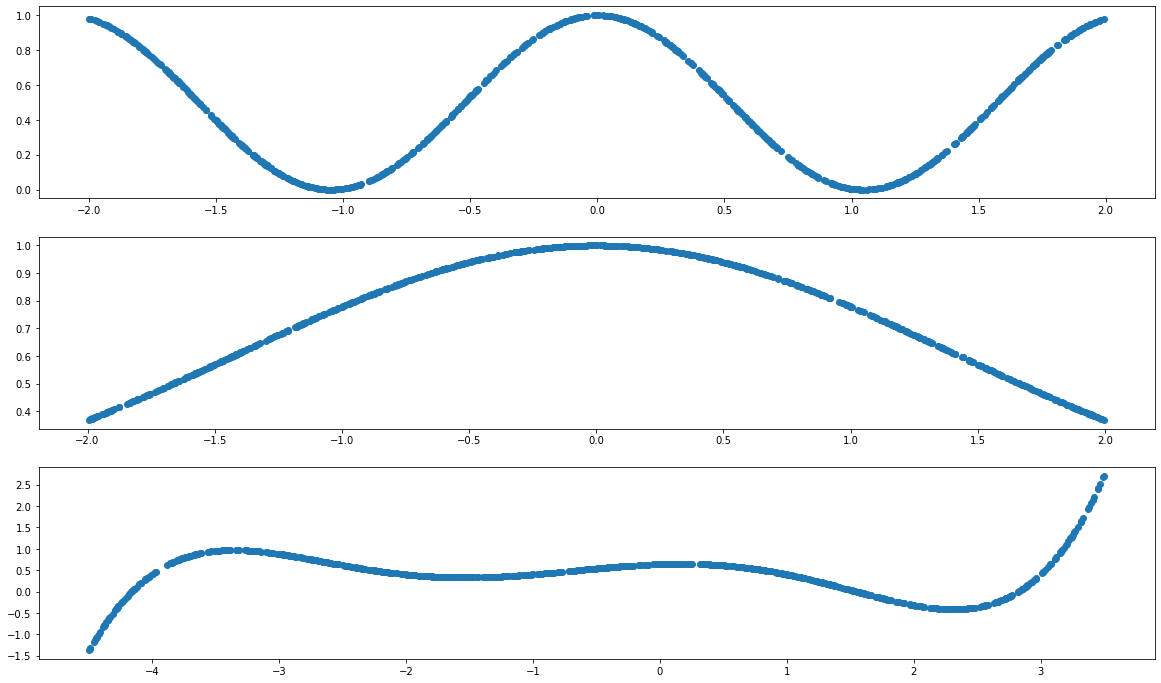

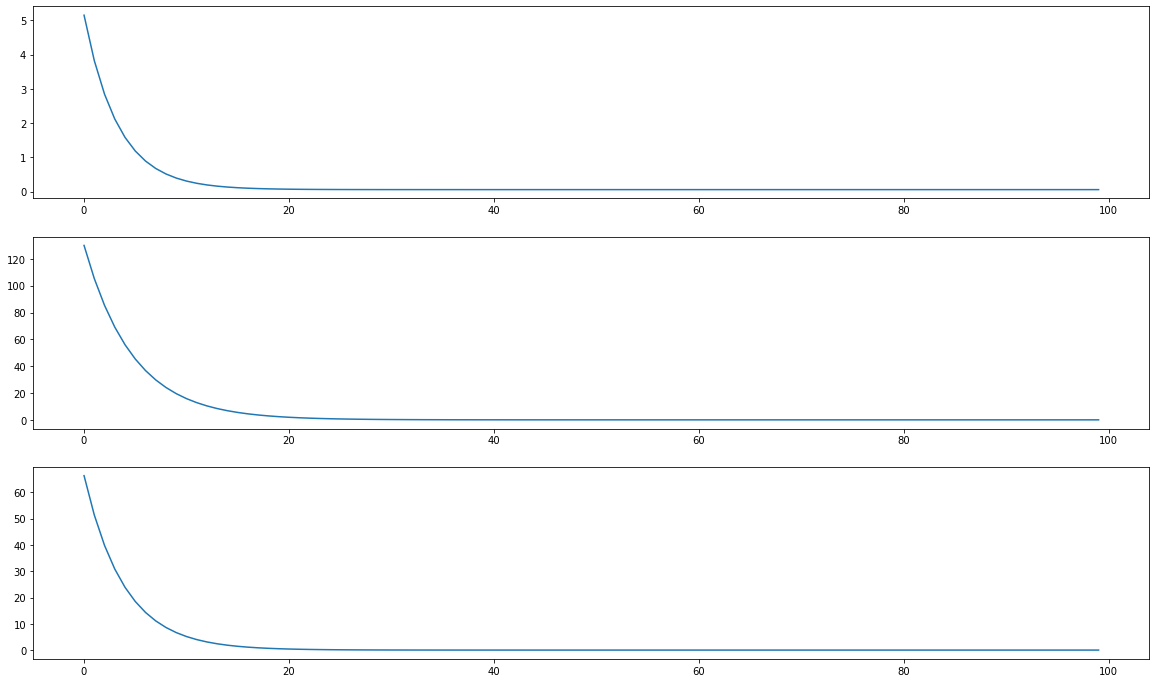

In [3]:
# define number of samples
d = numpy.random.randint(low=20, high=2000)

# datasets
x_1 = numpy.random.uniform(low=-2, high=2, size=(d+1))
x_1[0] = 1. # add bias
t_1 = cosine(x_1)

x_2 = numpy.random.uniform(low=-2, high=2, size=(d+1))
x_2[0] = 1. # add bias
t_2 = gaussian(x_2)

x_3 = numpy.random.uniform(low=-4.5, high=3.5, size=(d+1))
x_3[0] = 1. # add bias
t_3 = polynomial(x_3)

# init weights
k = 10 # number of hidden neurons
w_1 = numpy.random.uniform(low=-10, high=10, size=(k+1,d+1)) # first layer weights
w_1[0,:] = 0 # set to zero (bias)
w_2 = numpy.random.uniform(low=-10, high=10, size=(k+1)) # second layer weights

# learning rate
eta = 0.01

# number of epochs
epochs = 100

# run gradient descent for x_1 dataset
w_x_1_1, w_x_1_2, loss_1 = gradient_descent(x_1, t_1, numpy.copy(w_1), numpy.copy(w_2), eta, epochs)


# run gradient descent for x_3 dataset
w_x_2_1, w_x_2_2, loss_2 = gradient_descent(x_2, t_2, numpy.copy(w_1), numpy.copy(w_2), eta, epochs)

# run gradient descent for x_3 dataset
w_x_3_1, w_x_3_2, loss_3 = gradient_descent(x_3, t_3, numpy.copy(w_1), numpy.copy(w_2), eta, epochs)


# plot the graphs
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(20,12))
ax1.scatter(x_1, t_1)
ax2.scatter(x_2, t_2)
ax3.scatter(x_3, t_3)

# plot the loss functions
x = numpy.arange(0,epochs)
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(20,12))
ax1.plot(x, loss_1)
ax2.plot(x, loss_2)
ax3.plot(x, loss_3)

